# ANN

In [ ]:
#mount google drive to be able to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import savetxt

## Path for datasets

In [ ]:
path = '/content/drive/MyDrive/PRML/IITM/Question1/' #path where the datasets are stored

## Importing the dataset

In [ ]:
trainingDataSet1 = pd.read_csv(path+'Train_Dataset1.csv', header = None) #read the training data from the Train_Dataset1.csv of dataset 1
X_train1 = trainingDataSet1.iloc[:, :-1].values #input feature is the first columns of our .csv file
y_train1 = trainingDataSet1.iloc[:, -1:].values #output is taken from the last column of the dataset

In [ ]:
trainingDataSet2 = pd.read_csv(path+'Train_Dataset2.csv', header = None) #read the training data from the Train_Dataset2.csv of dataset 2
X_train2 = trainingDataSet2.iloc[:, :-1].values #input feature is the first columns of our .csv file
y_train2 = trainingDataSet2.iloc[:, -1:].values #output is taken from the last column of the dataset

In [ ]:
testDataSet1 = pd.read_csv(path+'Test_Dataset1.csv', header = None) #read the test data from the Test_Dataset1.csv of dataset 1
X_test1 = testDataSet1.iloc[:, :-1].values #input feature is the first columns of our .csv file
y_test1 = testDataSet1.iloc[:, -1:].values #output is taken from the last column of the dataset

In [ ]:
testDataSet2 = pd.read_csv(path+'Test_Dataset2.csv', header = None) #read the test data from the Test_Dataset2.csv of dataset 2
X_test2 = testDataSet2.iloc[:, :-1].values #input feature is the first columns of our .csv file
y_test2 = testDataSet2.iloc[:, -1:].values #output is taken from the last column of the dataset

## Global variables

Learning rates and number of nodes in hidden layer makes the hyperparameters. 
To tune the hyperparaeters, learning_rate1 and learning_rate2 were varied to learn the learning_rates. For the number of nodes in hidden layer, layer_sizes1[1] and layer_sizes1[2] were varied.

In [ ]:
training_examples1 = X_train1.shape[0] #number of training examples in training dataset 1
training_examples2 = X_train2.shape[0] #number of training examples in training dataset 2
test_examples1 = X_test1.shape[0] #number of test examples in training dataset 1
test_examples2 = X_test2.shape[0] #number of test examples in training dataset 2
learning_rate1 = 0.00099 #learning rate for dataset 1
layer_sizes1 = [1,5,1] #the three values correspond to number of nodes in input layer, hidden layer and output layer of dataset 1 repectively.
learning_rate2 = 0.00005 #learning rate for dataset 2
layer_sizes2 = [1,3,1] #the three values correspond to number of nodes in input layer, hidden layer and output layer of dataset 2 repectively.

In [ ]:
np.random.seed(42) #setting the random seed to make sure the same output gets generated

## Visualise training data

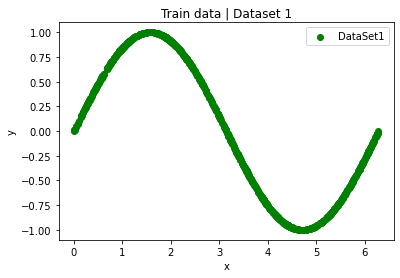

In [ ]:
plt.scatter(X_train1,y_train1,color = 'green', label = 'DataSet1') #scatter plot the training data on dataset1
plt.title('Train data | Dataset 1')
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

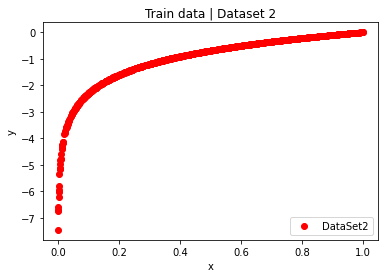

In [ ]:
plt.scatter(X_train2,y_train2,color = 'red', label = 'DataSet2') #scatter plot the training data on dataset2
plt.title('Train data | Dataset 2')
plt.legend(loc="lower right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Normalize Dataset

Using minmax scalar to normalise the dataset. $$X_{norm} = \frac{X_i - min(X)}{max(X) - min(X)}$$

In [ ]:
def dataset_minmax(X): #function to calculate the minimum and maximum value of the column X
  minmax = []
  minn = min(X) #returns min of X
  maxx = max(X) #returns max of X
  minmax.append([minn, maxx])
  return minmax # return both min and max
 

In [ ]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(X, iterations, minmax):
  X_norm = np.empty(X.shape) #creating an empty np.ndarray 
  for i in range(0, iterations): #normalise all training examples
    X_norm[i] = (X[i] - minmax[0][0]) / (minmax[0][1] - minmax[0][0])
  return X_norm #returning the normalized column

In [ ]:
#normalizing training data of dataset1
minmax_x1 = dataset_minmax(X_train1) 
X_train1_norm = normalize_dataset(X_train1, training_examples1, minmax_x1) 

#normalizing training data of dataset2
minmax_x2 = dataset_minmax(X_train2)
X_train2_norm = normalize_dataset(X_train2, training_examples2, minmax_x2)

#normalizing test data of dataset1
minmax_xt1 = dataset_minmax(X_test1)
X_test1_norm = normalize_dataset(X_test1, test_examples1, minmax_xt1)

#normalizing test data of dataset2
minmax_xt2 = dataset_minmax(X_test2)
X_test2_norm = normalize_dataset(X_test2, test_examples2, minmax_xt2)


## Building a neural network on the Training set

### Least Square Error

Using standard mean square error to compute the loss. $$MSE = \frac{1}{n}\sum (y_{true} - y_{pred})^2$$

In [ ]:
def mse(y, y_pred): #function to return the loss
  loss = np.sum((y - y_pred)**2) / len(y)
  return loss

### Sigmoid Function

Using sigmoid function as the activation function. $$\sigma (x) = \frac{1}{1 + e^{-x}}$$

In [ ]:
def sigmoid(X): #function to compute sigmoid activation
  return 1/(1+np.exp(-X))

### Initialize parameters

Initialize the weights and the biases of the network. Using the random number generator to initialize the weights and the biases of the network.

In [ ]:
def init(layerSizes): #function to initialize the weights and the biases
  thetas = {} #dictionary to hold the values of all the weights and biases
  for i in range (1, len(layerSizes)): # 2 iterations to initialize the weights and biases before and after the hidden layer
    thetas['W'+ str(i)] = np.random.randn(layerSizes[i], layerSizes[i-1])*0.01 #first iteration, W1 = no of hidden nodes x 1; second iteration, W2 = 1 x no of hidden nodes (dimensions)
    thetas['B'+ str(i)] = np.random.randn(layerSizes[i], 1)*0.01 #first iteration, B1 = no of hidden nodes x 1; second iteration, B2 = 1 x 1 (dimensions)
  return thetas #return the initial weights and biases

### Forward propagation

Forward propagation involves 2 steps: performing linear combination of output from previous layer with the weights and biases ; and applying activation function on linear combination output.

In [ ]:
def forward_propagation(X, thetas): #function to return the numpy arrays of activations of all layers
    layers = len(thetas)//2 #integer division; thetas contain 2 values for W and 2 values for B. We need to iterate only twice to update these 2 values. So taking half
    values = {} #dictionary containining the numpy arrays of activations of all layers
    for i in range(1, layers+1): # 2 iterations to update the weights and biases before and after the hidden layer
        if i==1: #for the first hidden layer, linear combination with respect to input X and activation on the LC output
            values['Z' + str(i)] = np.dot(thetas['W' + str(i)], X) + thetas['B' + str(i)] #storing LC output
            values['A' + str(i)] = sigmoid(values['Z' + str(i)]) # storing Activation output
        else: #for the other hidden layers, linear combination with respect to previous layers' output and activation on the LC output
            values['Z' + str(i)] = np.dot(thetas['W' + str(i)], values['A' + str(i-1)]) + thetas['B' + str(i)]
            if i==layers: # no sigmoid on the last layer. No any other activation because it is a regression problem
                values['A' + str(i)] = values['Z' + str(i)]
            else: #sigmoid for every other layer
                values['A' + str(i)] = sigmoid(values['Z' + str(i)])
    return values #return the learnt activations of all the layers.

### Compute cost using standard mean squared loss function

Using standard mean square error to compute the loss. $$cost = \frac{1}{n}\sum (y_{true} - y_{pred})^2$$
We have defined it again to be able to take y_pred value from values of forward propagation.

In [ ]:
def compute_cost(values, y_train): #takes true values and dictionary having activations of all layers as input and returns cost
    layers = len(values)//2 #integer division; values contain 2 values for A and 2 values for Z. We need to iterate only twice to update these 2 values. So taking half
    y_pred = values['A' + str(layers)] #predicted output is the activation output of the last layer
    cost = 1/(len(y_train)) * np.sum(np.square(y_pred - y_train))
    return cost #return the cost computed.

### Back propagation

Backward propagation involves traversing inwards from the output layer to update the weights and biases. The backpropagation formula for the hidden layers can be given as,
$$\delta_j = h'(a_j) \sum_k w_{kj} \delta_k$$
However, for the output layer, it is
$$\delta_k = y_{pred} - y_{true}$$

In [ ]:
def backward_propagation(thetas, values, X, Y): #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(thetas)//2 #integer division; thetas contain 2 values for W and 2 values for B. We need to iterate only twice to update these 2 values. So taking half
    m = len(Y) #number of data points
    grads = {} #dictionary to store the updated weights and biases
    for i in range(layers,0,-1):  # 2 iterations to update the weights and biases before and after the hidden layer
        if i==layers: #for the output layer dA = y_pred - y_true
            dA = (values['A' + str(i)] - Y)
            dZ = dA
        else: #for other layers, calculate del with the formula mentioned above.
            dA = np.dot(thetas['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1: #no need to back propagate on input layer. For first hidden layer, update the gradient wrt X
            grads['W' + str(i)] = np.dot(dZ, X.T)
            grads['B' + str(i)] =  np.sum(dZ, axis=1, keepdims=True) #keepdims to make sure the output is a np.ndarray
        else: #for the other hidden layers, update the gradient with respect to values from previous layers' forward propagation output
            grads['W' + str(i)] =  np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] =  np.sum(dZ, axis=1, keepdims=True)
    return grads #return the gradients with the updated weights and biases

### Gradient Descent

Performing gradient descent to update and learn the weights

In [ ]:
def gradient_descent(thetas, grads, learning_rate): #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(thetas)//2 #integer division; thetas contain 2 values for W and 2 values for B. We need to iterate only twice to update these 2 values. So taking half
    thetas_updated = {} #dictionary to hold the values of all the updated weights and biases
    for i in range(1,layers+1):  # 2 iterations to update the weights and biases before and after the hidden layer
        thetas_updated['W' + str(i)] = thetas['W' + str(i)] - learning_rate * grads['W' + str(i)] #using the learning rate to update the weights and biases
        thetas_updated['B' + str(i)] = thetas['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return thetas_updated #return the updated weights and biases

### Neural Network model 

In [ ]:
def model(X, Y, layer_sizes, training_examples, learning_rate): #function to train the model
    thetas = init(layer_sizes) #initialize the network
    for i in range(training_examples): #for all training examples
        values = forward_propagation(X.T, thetas) #perform forward propagation
        cost = compute_cost(values, Y.T) #compute its cost
        grads = backward_propagation(thetas, values, X.T, Y.T) # perform backward propagation
        thetas = gradient_descent(thetas, grads, learning_rate) #update the weights and biases through gradient descent
    return thetas #return the updated weights and biases

In [ ]:
thetas1 = model(X_train1_norm, y_train1, layer_sizes1, training_examples1, learning_rate1) #modelling dataset1

In [ ]:
thetas2 = model(X_train2, y_train2, layer_sizes2, training_examples2, learning_rate2) #modelling dataset2

## Predicting the results

Using the final outputs from forward propagation with the learned thetas for prediction

In [ ]:
def predict(X, thetas):  #predict on new array X given learnt parameters
    values = forward_propagation(X.T, thetas) #perform forward propagation with learned thetas
    predictions = values['A' + str(len(values)//2)].T #the final layer output of forward propagation is the final prediction
    return predictions #return the predicted values

In [ ]:
#prediction on train data
y_pred_train1 = predict(X_train1_norm, thetas1) #dataset 1
y_pred_train2 = predict(X_train2, thetas2) #dataset 2

In [ ]:
#prediction on test data
y_pred_test1 = predict(X_test1_norm, thetas1) #dataset 1
y_pred_test2 = predict(X_test2, thetas2) #dataset 2

## MSE on predicted values

In [ ]:
#calculating training loss
print(mse(y_train1, y_pred_train1)) #dataset 1
print(mse(y_train2, y_pred_train2)) #dataset 2

#calculating test loss
print(mse(y_test1, y_pred_test1)) #dataset 1
print(mse(y_test2, y_pred_test2)) #dataset 2

0.15747556614802385
0.1268654781477297
0.14129373389378339
0.03428398031457082


## Visualise prediction

Common function to plot the test data along with its true output and predicted output

In [ ]:
def plot_pred_data(X, y, y_pred,s,i):
  plt.scatter(X, y, color = 'red', label = 'Input X') #scatter plot features
  X_plot, y_plot = zip(*sorted(zip(X, y)))
  plt.plot(X_plot, y_plot, color = 'blue', label = 'True value') #plotting true output
  X_plot2, y_plot2 = zip(*sorted(zip(X, y_pred)))
  plt.plot(X_plot2, y_plot2, color = 'green', label = 'Predicted value') #plot predicted output
  plt.title('ANN on' + s + ' | Dataset  '+ str(i))
  plt.legend(loc="upper right")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

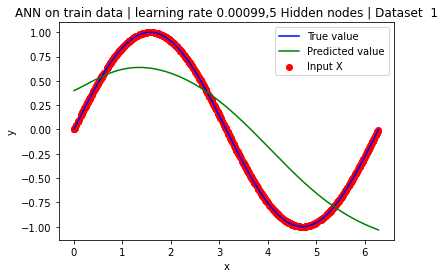

In [ ]:
plot_pred_data(X_train1, y_train1,y_pred_train1, ' train data | learning rate '+ str(learning_rate1) +','+ str(layer_sizes1[1]) + ' Hidden nodes', 1) #plot on training dataset 1

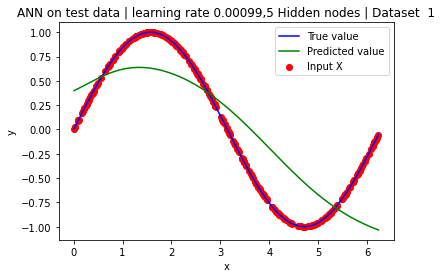

In [ ]:
plot_pred_data(X_test1, y_test1,y_pred_test1,  ' test data | learning rate '+ str(learning_rate1) +','+ str(layer_sizes1[1]) + ' Hidden nodes', 1) #plot on test dataset 1

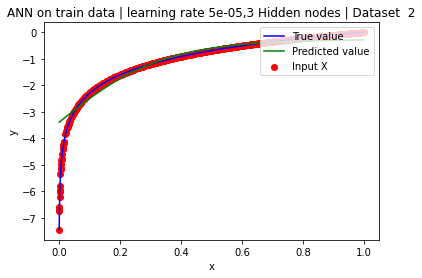

In [ ]:
plot_pred_data(X_train2, y_train2,y_pred_train2, ' train data | learning rate '+ str(learning_rate2) +','+ str(layer_sizes2[1]) + ' Hidden nodes', 2) #plot on train dataset2

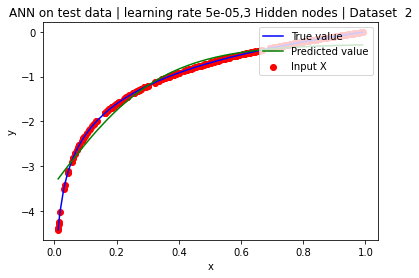

In [ ]:
plot_pred_data(X_test2, y_test2,y_pred_test2, ' test data | learning rate '+ str(learning_rate2) +','+ str(layer_sizes2[1]) + ' Hidden nodes', 2) #plot on test dataset2